In [1]:
! git clone https://github.com/a-m-k-18/Workshop

Cloning into 'Workshop'...
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 4 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (4/4), done.


In [2]:
ls

sample_data/  Workshop/


In [3]:
cd Workshop

/content/Workshop


In [4]:
!ls

test.csv  train.csv


In [0]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk


%matplotlib inline

In [0]:
combi  = pd.read_csv('train.csv')

In [7]:
combi.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


A) Removing Twitter Handles (@user)

In [8]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], "@[\w]*")

combi.head()

,id,label,tweet,tidy_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [9]:
print(combi)

          id  ...                                         tidy_tweet
0          1  ...    when a father is dysfunctional and is so sel...
1          2  ...    thanks for #lyft credit i can't use cause th...
2          3  ...                                bihday your majesty
3          4  ...  #model   i love u take with u all the time in ...
4          5  ...             factsguide: society now    #motivation
...      ...  ...                                                ...
31957  31958  ...  ate  isz that youuu?ððððððð...
31958  31959  ...    to see nina turner on the airwaves trying to...
31959  31960  ...  listening to sad songs on a monday morning otw...
31960  31961  ...   #sikh #temple vandalised in in #calgary, #wso...
31961  31962  ...                        thank you  for you follow  

[31962 rows x 4 columns]


B) Removing Punctuations, Numbers, and Special Characters

In [10]:
# remove special characters, numbers, punctuations
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")
print(combi)

          id  ...                                         tidy_tweet
0          1  ...    when a father is dysfunctional and is so sel...
1          2  ...    thanks for #lyft credit i can t use cause th...
2          3  ...                                bihday your majesty
3          4  ...  #model   i love u take with u all the time in ...
4          5  ...             factsguide  society now    #motivation
...      ...  ...                                                ...
31957  31958  ...  ate  isz that youuu                           ...
31958  31959  ...    to see nina turner on the airwaves trying to...
31959  31960  ...  listening to sad songs on a monday morning otw...
31960  31961  ...   #sikh #temple vandalised in in #calgary  #wso...
31961  31962  ...                        thank you  for you follow  

[31962 rows x 4 columns]


C) Removing Short Words

In [11]:
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
combi.head()

,id,label,tweet,tidy_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguide society #motivation


D) Tokenisation

In [0]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split())

E) Stemming

In [13]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, caus, they, offer, whee...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
Name: tidy_tweet, dtype: object

In [14]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

combi['tidy_tweet'] = tokenized_tweet
combi.head()

,id,label,tweet,tidy_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus they offer wheelchair ...
2,3,0,bihday your majesty,bihday your majesti
3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguid societi #motiv


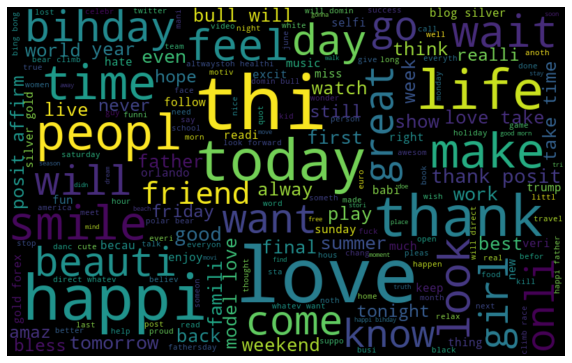

In [15]:
all_words = ' '.join([text for text in combi['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

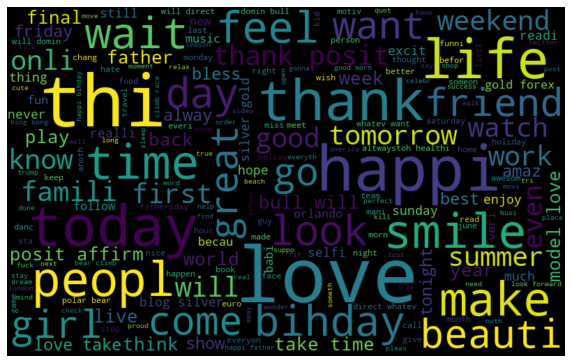

In [16]:
normal_words =' '.join([text for text in combi['tidy_tweet'][combi['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

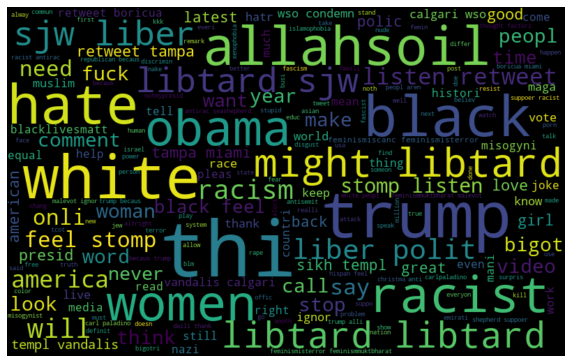

In [17]:
negative_words = ' '.join([text for text in combi['tidy_tweet'][combi['label'] == 1]])

wordcloud = WordCloud(width=800, height=500,random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(combi['tidy_tweet'])
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,accuracy_score

train_bow = bow[:31962,:]


# splitting data into training and validation set
X_train, X_test, y_train, y_test = train_test_split(train_bow, combi['label'], random_state=42, test_size=0.3)

lreg = LogisticRegression()
lreg.fit(X_train, y_train) # training the model

prediction = lreg.predict_proba(X_test) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)

print(f1_score(y_test, prediction_int)) # calculating f1 score
print(accuracy_score(y_test , prediction_int))

0.5353283458021613
0.9417040358744395


In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(combi['tidy_tweet'])

train_tfidf = tfidf[:31962,:]

X_train, X_test, y_train, y_test = train_test_split(train_tfidf, combi['label'], random_state=42, test_size=0.3)

lreg = LogisticRegression()
lreg.fit(X_train, y_train) # training the model

prediction = lreg.predict_proba(X_test) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)

print(f1_score(y_test, prediction_int)) # calculating f1 score
print(accuracy_score(y_test , prediction_int))

0.5328596802841918
0.9451454791949109
